# Παλινδρόμηση 


---

> Πάνος Λουρίδας, Αναπληρωτής Καθηγητής <br />
> Τμήμα Διοικητικής Επιστήμης και Τεχνολογίας <br />
> Οικονομικό Πανεπιστήμιο Αθηνών <br />
> louridas@aueb.gr

* Οι βασικές βιβλιοθήκες που θα χρησιμοποιήσουμε είναι η SciPy και η statsmodels.

* Η [SciPy](https://www.scipy.org/) προσφέρει διάφορες στατιστικές συναρτήσεις.

* Η [statsmodels](https://www.statsmodels.org/stable/index.html) προσφέρει υλοποιήσεις μοντέλων για στατιστική εκτίμηση.

In [1]:
%matplotlib inline

import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
from plotnine import *
import seaborn as sns
import scipy.stats as stats

sns.set_theme()

* Χρησιμοποιούμε την *παλινδρόμηση* (regression), όταν θέλουμε να διερευνήσουμε τη σχέση μεταξύ μιας μεταβλητής (την αποκαλούμε *εξαρτημένη*, dependent) και μιας ή περισσότερων άλλων μεταβλητών (που τις αποκαλούμε *ανεξάρτητες*, independent).

* Επίσης χρησιμοποιούνται οι όροι *ενδογενής* (endogenous, endog) για την εξαρτημένη και *εξωγενής* (exogenous, exog) για κάθε ανεξάρτηση μεταβλητή.

* Συγκεκριμένα, θέλουμε να διερευνήσουμε αν πράγματι η εξαρτημένη μεταβλητή εξαρτάται από τις ανεξάρτητες μεταβλητές. 

* Στην απλούστερη περίπτωση έχουμε μόνο δύο μεταβλητές, μια εξαρτημένη και μία ανεξάρτητη, και τις χειριζόμαστε με τη *γραμμική παλινδρόμηση* (linear regression).

* Η γραμμική παλινδρόμηση ξεκινάει με την *υπόθεση* ότι η σχέση μεταξύ της εξαρτημένης μεταβλητής $y$ και της ανεξάρτητης μεταβλητής $x$ έχει τη μορφή:

$$y = \alpha + \beta x + \epsilon$$

* Στην πράξη, έχουμε ένα σύνολο παρατηρήσεων $y_i$ και $x_i$ και θέλουμε να εκτιμήσουμε τα $\alpha$ και $\beta$.

* Θα ξεκινήσουμε με ένα ιστορικό παράδειγμα, το οποίο εισήγαγε την έννοια της παλινδρόμησης.

* Πρόκειται για μία έρευνα που δημοσίευσε ο Francis Galton, to 1886, στην οποία εξέτασε το ύψος των παιδιών σε σχέση με το ύψος των γονιών τους.

In [2]:
galton_families = sm.datasets.get_rdataset("GaltonFamilies", package="HistData")

galton_families.data

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,001,78.5,67.0,75.43,4,1,male,73.2
1,001,78.5,67.0,75.43,4,2,female,69.2
2,001,78.5,67.0,75.43,4,3,female,69.0
3,001,78.5,67.0,75.43,4,4,female,69.0
4,002,75.5,66.5,73.66,4,1,male,73.5
...,...,...,...,...,...,...,...,...
929,203,62.0,66.0,66.64,3,1,male,64.0
930,203,62.0,66.0,66.64,3,2,female,62.0
931,203,62.0,66.0,66.64,3,3,female,61.0
932,204,62.5,63.0,65.27,2,1,male,66.5


* Ας πάρουμε τους πατεράδες και τους γιούς.

In [3]:
fathers_sons = galton_families.data[galton_families.data['gender'] == 'male']
fathers_sons

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,001,78.5,67.0,75.43,4,1,male,73.2
4,002,75.5,66.5,73.66,4,1,male,73.5
5,002,75.5,66.5,73.66,4,2,male,72.5
8,003,75.0,64.0,72.06,2,1,male,71.0
10,004,75.0,64.0,72.06,5,1,male,70.5
...,...,...,...,...,...,...,...,...
918,199,64.0,64.0,66.56,7,2,male,68.0
924,200,64.0,63.0,66.02,1,1,male,64.5
925,201,64.0,60.0,64.40,2,1,male,66.0
929,203,62.0,66.0,66.64,3,1,male,64.0


* Μπορούμε να ξεκινήσουμε με το συντελεστή Pearson για να δούμε αν υπάρχει κάποια ένδειξη για γραμμική συσχέτιση μεταξύ του ύψους των γιών και των πατεράδων.

In [4]:
# Calculate Pearson correlation
correlationP, p_valueP = stats.pearsonr(x=fathers_sons['father'], y=fathers_sons['childHeight'])

# Print the results
print(f"Pearson correlation coefficient: {correlationP:.6f}")
print(f"P-value: {p_valueP}")

Pearson correlation coefficient: 0.392383
P-value: 3.737108856194379e-19


* Ο πιο απλός τρόπος να δουλέψουμε με παλινδρόμηση σε Python είναι χρησιμοποιώντας *τύπους* (formulas) όπως στο πρόγραμμα στατιστικής R.

* Ορίζουμε ένα μοντέλο με βάση τον κατάλληλο μαθηματικό τύπο.

* Στη συνέχεια εφαρμόζουμε το μοντέλο στα δεδομένα μας καλώντας τη μέθοδο `fit()`.

* Η ιδιότητα `params` των αποτελεσμάτων μας δίνει την *τεταγμένη* (intercept) και την *κλήση* (slope) της γραμμής παλινδρόμησης.

In [5]:
fathers_sons_mod = smf.ols("childHeight ~ father", data=fathers_sons)
fathers_sons_res = fathers_sons_mod.fit()
fathers_sons_res.params

Intercept    38.362581
father        0.446523
dtype: float64

* Αυτό σημαίνει ότι η σχέση μεταξύ της μεταβλητής `childHeight` ($y$) του ύψους των γιών και του ύψους των πατεράδων `father` ($x$) είναι:

$$ y = 38{,}362581 + 0{,}446523 x $$

* Αν ο πατέρας είχε ύψος $0$ ίντσες (αδύνατον βέβαια), το ύψος του γιού είναι $38{,}362581$ ίντσες.

* Για κάθε ίντσα που αυξάνεται το ύψος του πατέρα, το ύψος του γιού αυξάνεται κατά $0{,}446523$ της ίντσας.

* Για να δούμε τι μας δείχνει η παλινδρόμηση, θα φτιάξουμε ένα διάγραμμα.

* Το διάγραμμα θα περιλαμβάνει τις παρατηρήσεις και τη γραμμή που προέκυψε από τη γραμμική παλινδρόμηση.

* Επίσης θα προσθέσουμε και τη διαγώνιο, με μπλε χρώμα γιατί θα μας βοηθήσει στην κατανόηση της παλινδρόμησης.

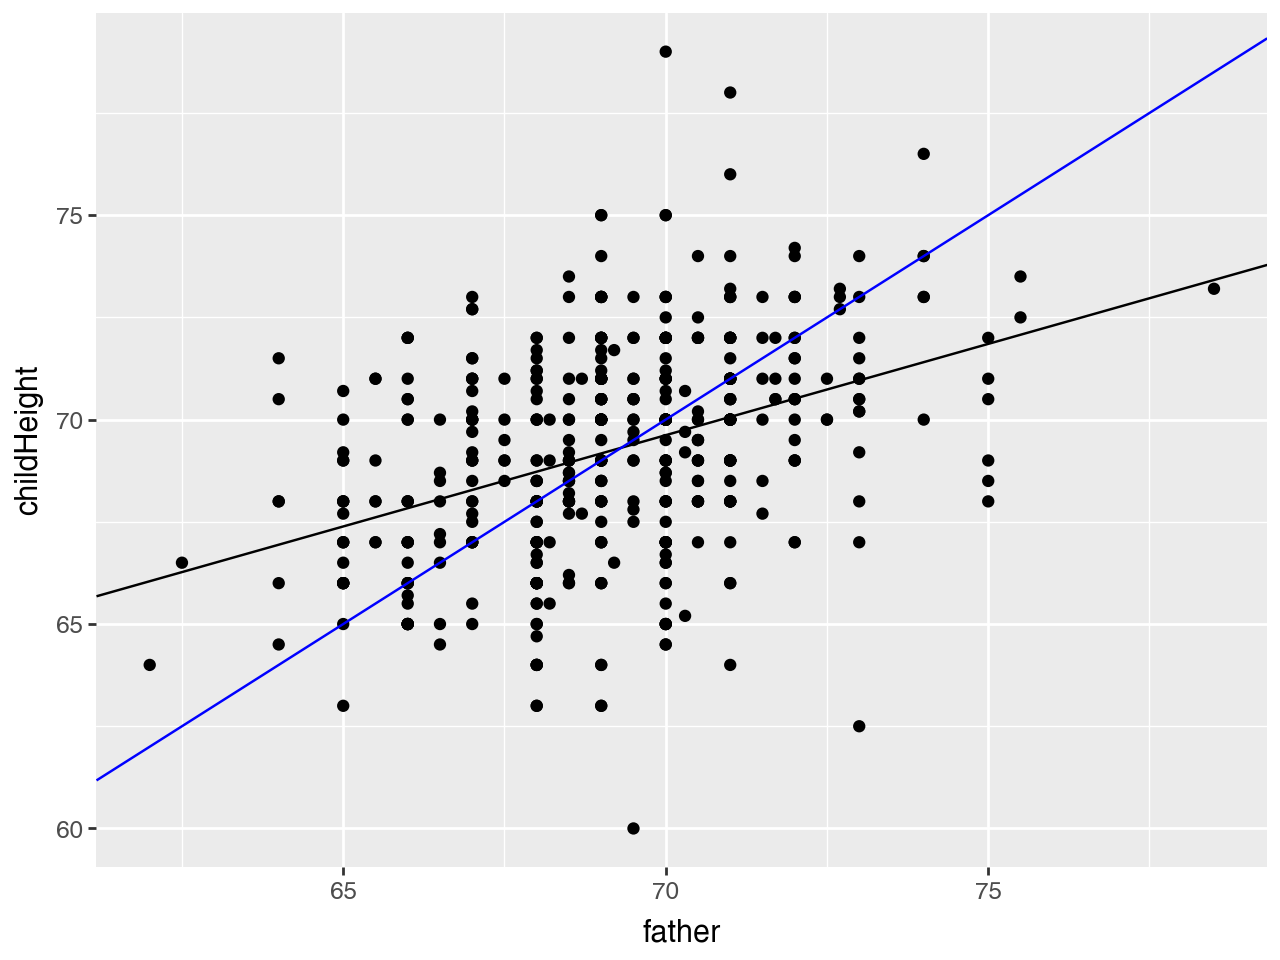

In [6]:
ggplot(data=fathers_sons) +\
    geom_point(mapping=aes(x='father', y='childHeight')) +\
    geom_abline(intercept=fathers_sons_res.params['Intercept'], 
                slope=fathers_sons_res.params['father']) +\
    geom_abline(intercept=0, slope=1, color='blue')

* Μπορούμε εύκολα να πάρουμε το διάγραμμα της παλινδρόμησης με τη συνάρτηση `lmplot()` του seaborn.

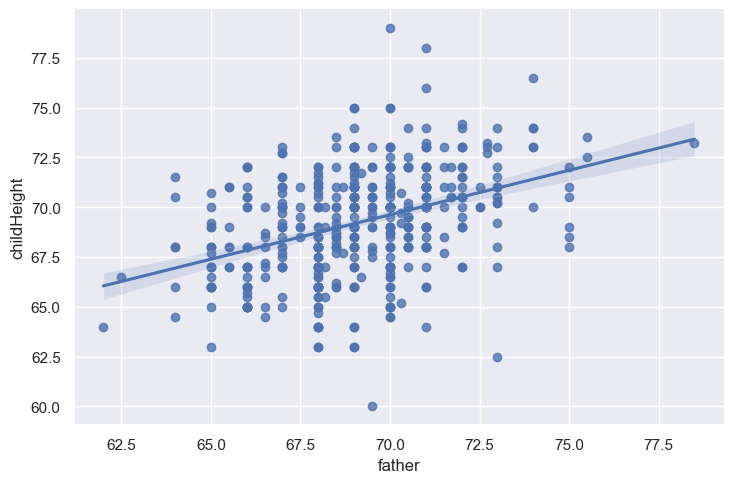

In [7]:
sns.lmplot(x='father', y='childHeight', data=fathers_sons, aspect=1.5)

* Μπορεί να είναι χρήσιμο να φτιάξουμε ένα γράφημα με τις προβλέψεις του μοντέλου μας, δηλαδή τα σημεία στη γραμμή της παλινδρόμησης που αντιστοιχούν στις τιμές της ανεξάρτησης μεταβλητής.

* Οι προβλέψεις είναι διαθέσιμες από το μοντέλο μας μέσω της ιδιότητας `fittedvalues`.

* Οι προβλέψεις γενικώς *δεν είναι ίσες με τις τιμές της εξαρτημένης μεταβλητής*.

In [8]:
fathers_sons_res.fittedvalues

0      73.414606
4      72.075038
5      72.075038
8      71.851776
10     71.851776
         ...    
918    66.940028
924    66.940028
925    66.940028
929    66.046983
932    66.270244
Length: 481, dtype: float64

* Στο διάγραμμα που θα φτιάξουμε θα χρησιμοποιήσουμε κόκκινο για τις προβλέψεις του μοντέλου και μαύρο για τις πραγματικές παρατηρήσεις.

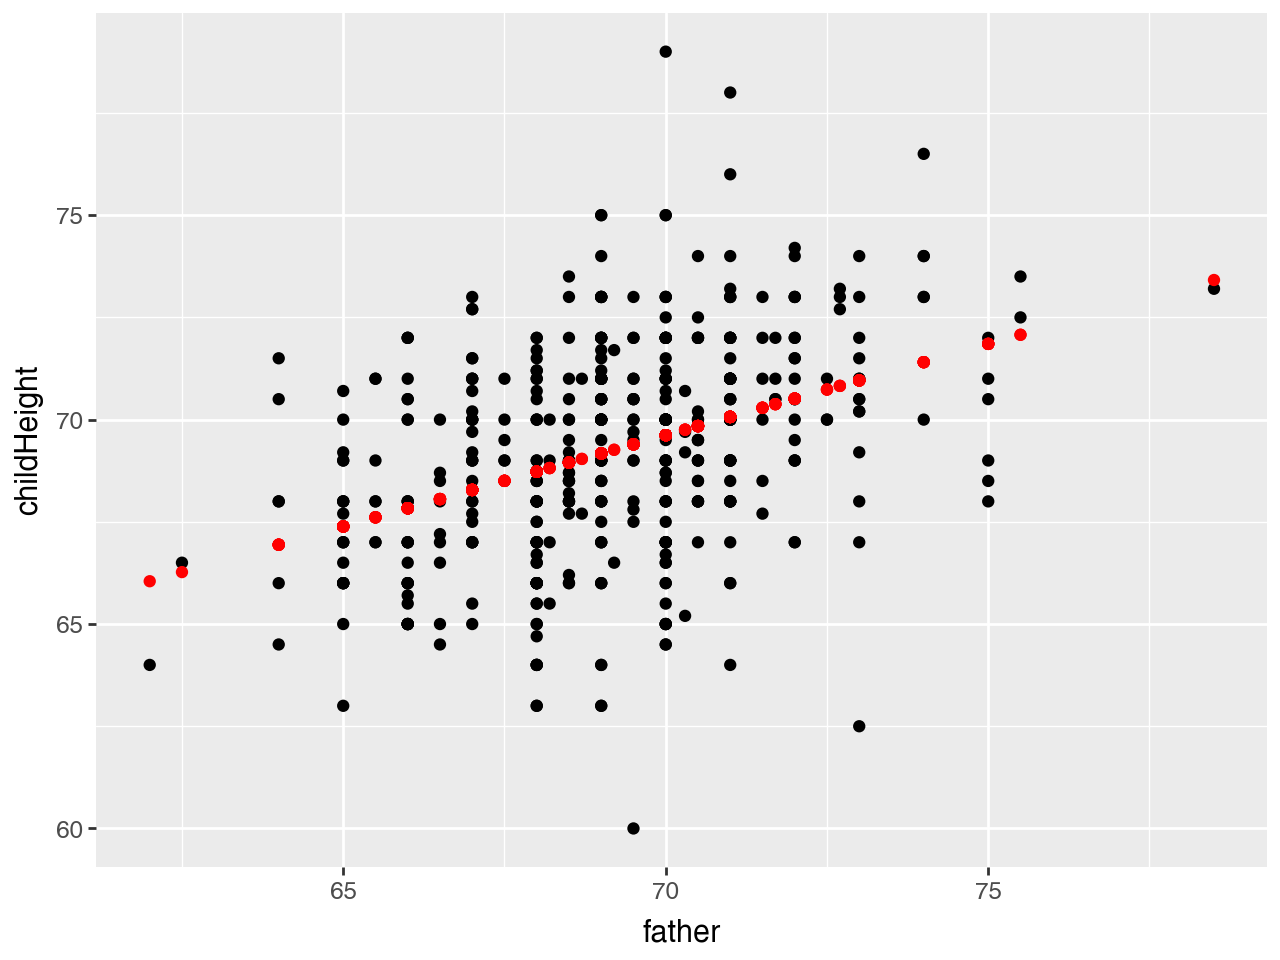

In [9]:
ggplot(data=fathers_sons) +\
    geom_point(mapping=aes(x='father', y='childHeight')) +\
    geom_point(mapping=aes(x='father', y=fathers_sons_res.fittedvalues), color='red')

* Μια σύνοψη όλων των παραμέτρων και των αποτελεσμάτων της παλινδρόμησης είναι διαθέσιμη από τη μέθοδο `summary()`.

In [10]:
fathers_sons_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            childHeight   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     87.17
Date:                Wed, 16 Jul 2025   Prob (F-statistic):           3.74e-19
Time:                        22:33:39   Log-Likelihood:                -1105.8
No. Observations:                 481   AIC:                             2216.
Df Residuals:                     479   BIC:                             2224.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.3626      3.308     11.596      0.000      31.862      44.863
father         0.4465      0.048      9.337      0.000       0.353       0.540
==============================================================================
Omnibus:                        8.610   Durbin-Watson:                   1.468
Prob(Omnibus):                  0.014   Jarque-Bera (JB):               12.731
Skew:                          -0.110   Prob(JB):                      0.00172
Kurtosis:                       3.766   Cond. No.                     2.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Στον συνοπτικό πίνακα αποτελεσμάτων, στην πρώτη γραμμή δίνεται ο *συντελεστής προσδιορισμού* (coefficient of determination) R-squared.

* Τον συντελεστή αυτόν μπορούμε να τον πάρουμε και με την ιδιότητα `rsquared`.

In [11]:
print(f"R-squared (R²) = {fathers_sons_res.rsquared}")

R-squared (R²) = 0.15396480845335314


* To $R^2$ είναι μια μετρική *καλής προσαρμογής* (goodness of fit), δηλαδή υποδεικνύει πόσο καλά ταιριάζουν τα δεδομένα στο μοντέλο μας.

* Το $R^2$ κυμαίνεται από το 0 έως το 1. 

* $R^2 = 0$ σημαίνει ότι οι προβλέψεις μας είναι ισοδύναμες με το να προβλέπαμε πάντα ως $y$ το μέσο όρο των παρατηρήσεων, για οποιαδήποτε τιμή του $x$.

* $R^2 = 1$ σημαίνει ότι οι παρατηρήσεις βρίσκονται σε μία ευθεία γραμμή.

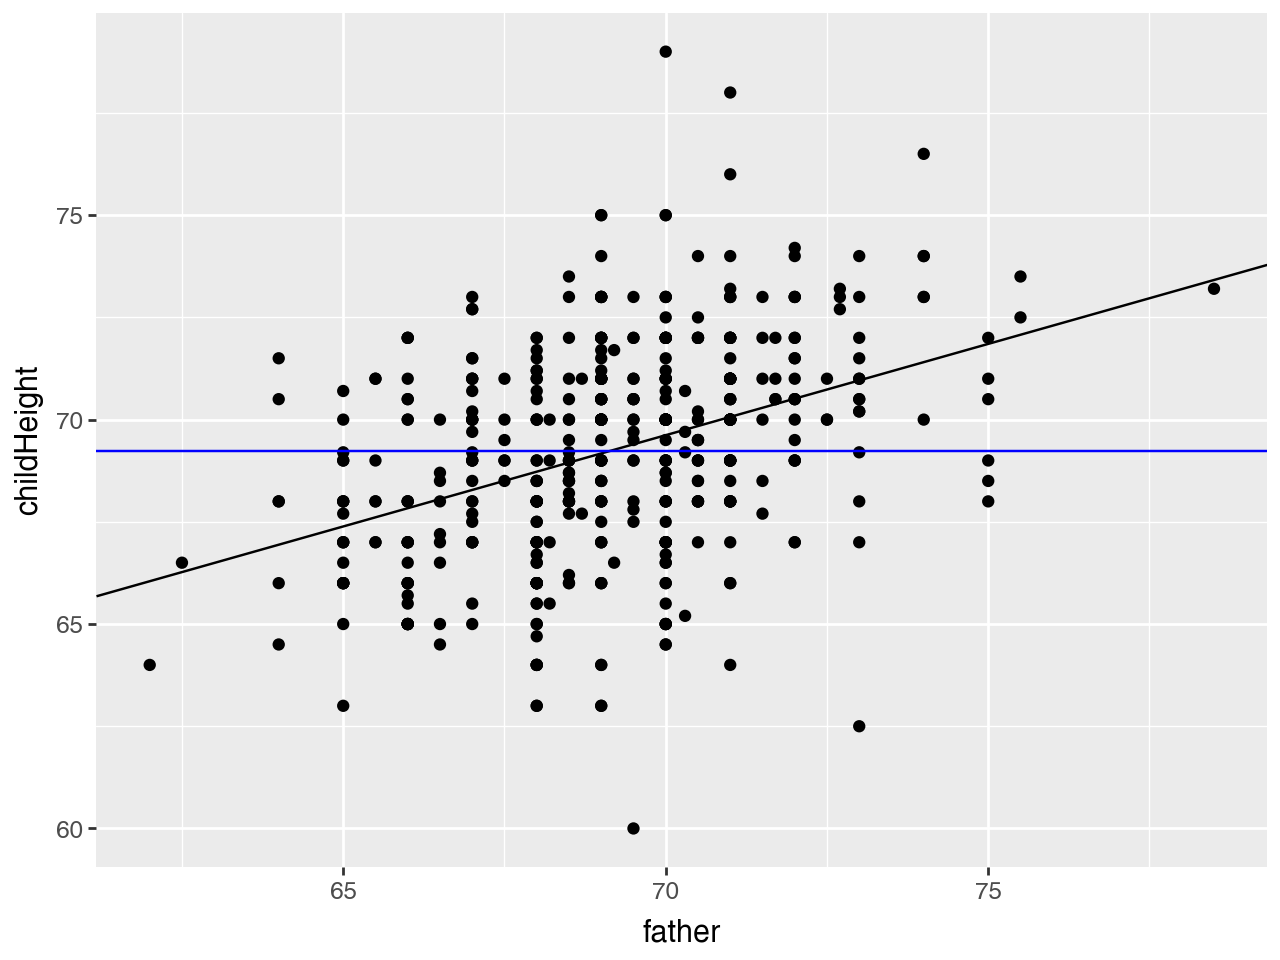

In [12]:
ggplot(data=fathers_sons) +\
    geom_point(mapping=aes(x='father', y='childHeight')) +\
    geom_abline(intercept=fathers_sons_res.params['Intercept'], 
                slope=fathers_sons_res.params['father']) +\
    geom_abline(intercept=fathers_sons.childHeight.mean(), slope=0, color='blue')

* Στη γραμμική παλινδρόμηση ισχύει ότι $R^2 = r^2$.

In [13]:
print(fathers_sons_res.rsquared, correlationP**2)
np.isclose(fathers_sons_res.rsquared, correlationP**2)

0.15396480845335314 0.15396480845335347


np.True_

* Η τιμή $R^2 = 0{,}154$ που παρατηρούμε σημαίνει ότι το μοντέλο μας εξηγεί το 15,4% της διακύμανσης (variation) του ύψους του γιού με βάση το ύψος του πατέρα.

* Πράγματι, οι τιμές είναι αρκετά απλωμένες γύρω από την ευθεία της παλινδρόμησης. 

* Η διαφορά μεταξύ της τιμής της εξαρτημένης μεταβλητής και της πρόβλεψης ονομάζεται *υπόλοιπο* (residual).

* Μπορούμε να χρησιμοποιήσουμε τα υπόλοιπα ενός μοντέλου για την κατασκευή ενός διαγράμματος.

* Στο διάγραμμα αυτό βάζουμε, για κάθε τιμή της ανεξάρτησης μεταβλητής, το αντίστοιχο υπόλοιπο.

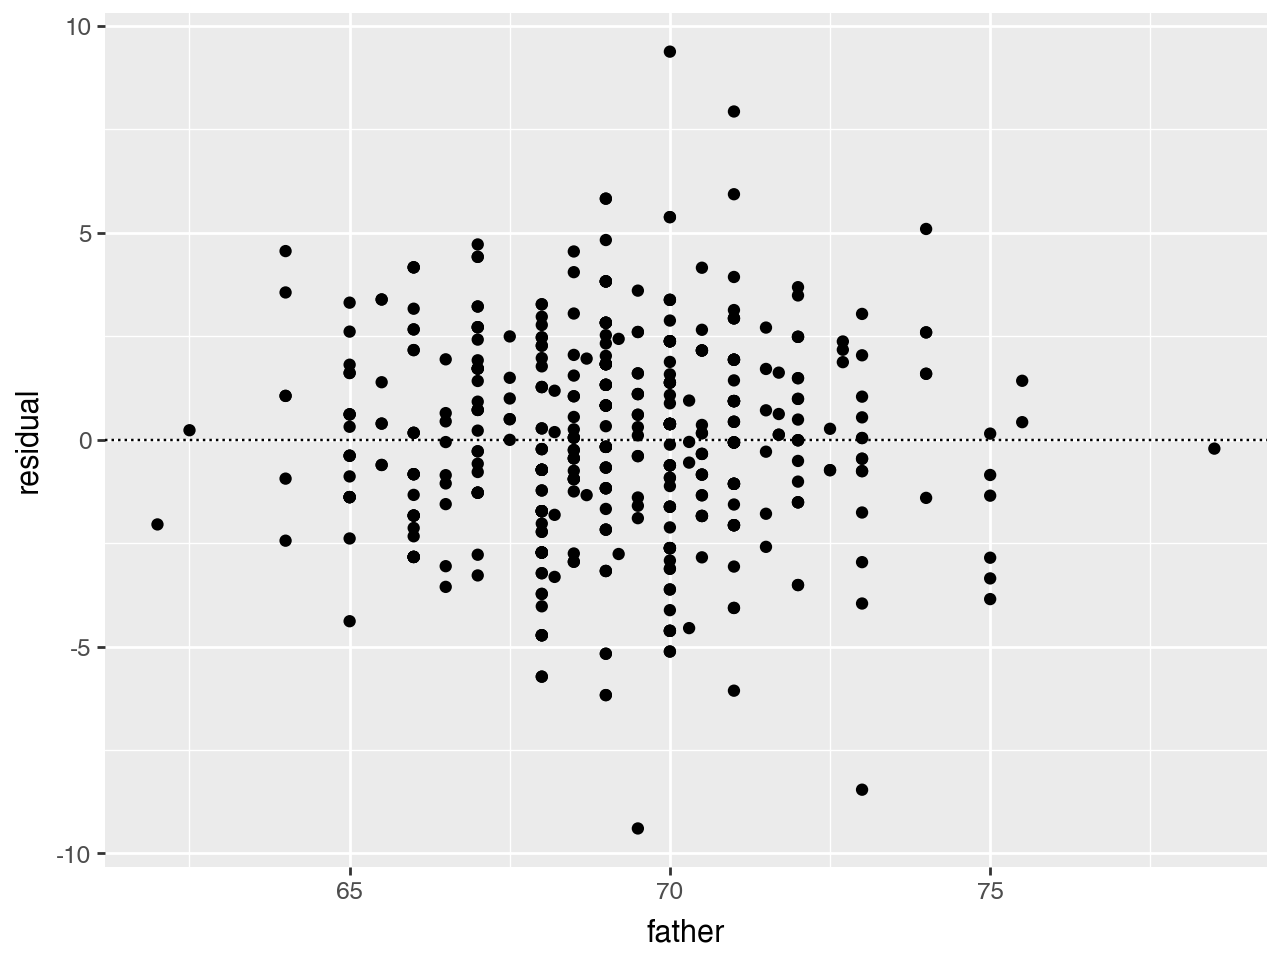

In [14]:
ggplot(data=fathers_sons) +\
    geom_hline(yintercept=0, color='black', linetype='dotted') +\
    geom_point(mapping=aes(x=fathers_sons['father'], y=fathers_sons_res.resid)) +\
    ylab('residual')

* Στο διάγραμμα που προκύπτει θα πρέπει να μην εμφανίζεται κάποια κανονικότητα.

* Τότε τα υπόλοιπα είναι όμως λέμε *ομοσκεδαστικά* (homoscedastic): δεν εξαρτώνται από την ανεξάρτητη μεταβλητή 

* Διαφορετικά, είναι *ετεροσκεδαστικά*, heteroscedastic.

* Αν στο διάγραμμα εμφανίζεται κάποια κανονικότητα και τα δεδομένα είναι ετεροσκεδαστικά, αυτό είναι ένδειξη ότι η υπόθεσή μας ότι ένα γραμμικό μοντέλο μπορεί να εξηγήσει τα δεδομένα μας μπορεί να είναι εσφαλμένη. 

* Το διάγραμμα υπολοίπων παράγεται πολύ εύκολα με το seaborn.

<Axes: xlabel='father', ylabel='childHeight'>

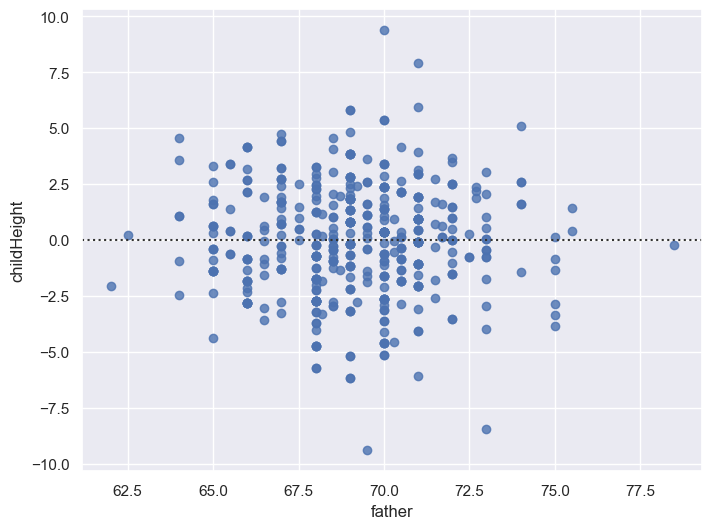

In [15]:
plt.figure(figsize=(8, 6))
sns.residplot(x='father', y='childHeight', data=fathers_sons)

* Ένα άλλο διαγνωστικό γράφημα που μπορούμε να κατασκευάσουμε είναι το διάγραμα QQ (quantile-quantile plot).

* Το διάγραμμα αυτό μας επιτρέπει να ελέγξουμε μια επιπλέον παραδοχή του μοντέλου της γραμμικής παλινδρόμησης, ότι τα υπόλοιπα ακολουθούν την κανονική κατανομή.

* Το διάγραμμα QQ απεικονίζει τα ποσοστημόρια (quantiles) των υπολοίπων και τα ποσοστημόρια μιας αντίστοιχης κανονικής κατανομής.

* Αν τα υπόλοιπα ακολουθούν την κανονική κατανομή, θα πρέπει τα σημεία της γραφικής παράστασης να πέφτουν πάνω στη διαγώνιο.

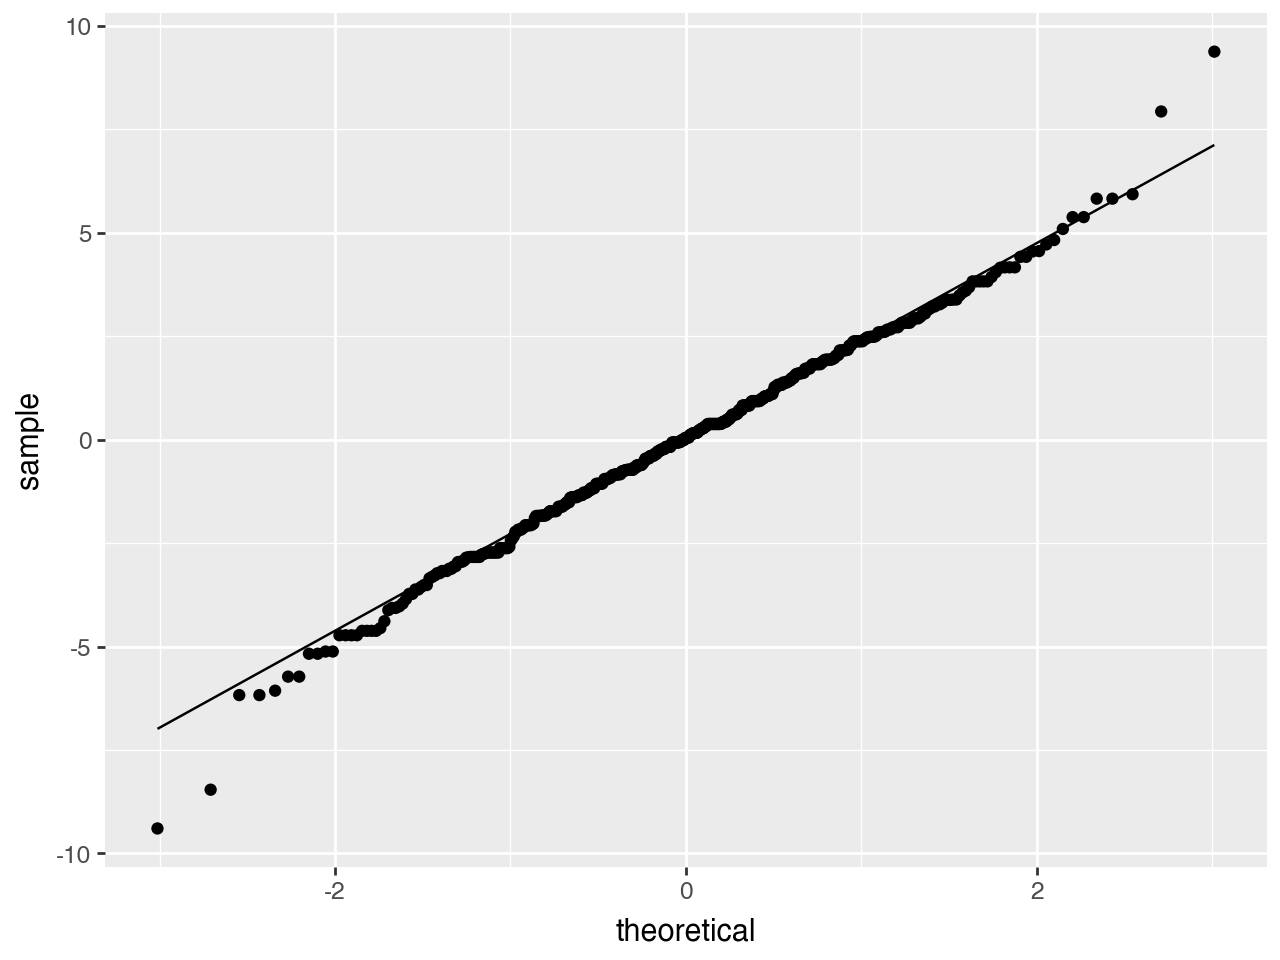

In [16]:
ggplot(data=fathers_sons_res.resid.to_frame().rename(columns={0: 'resid'})) +\
    geom_qq(mapping=aes(sample='resid')) +\
    geom_qq_line(mapping=aes(sample='resid'))

* Τα υπόλοιπα μας δίνουν το κλειδί για να καταλάβουμε πώς δουλεύει η γραμμική παλινδρόμηση.

* Η γραμμική παλινδρόμηση βρίσκει τη γραμμή εκείνη που ελαχιστοποιεί το άθροισμα των τετραγώνων των υπολοίπων.

* Αυτό το κάνει με τη μέθοδο των *Ελαχίστων Τετραγώνων* (Ordinary Least Squares).

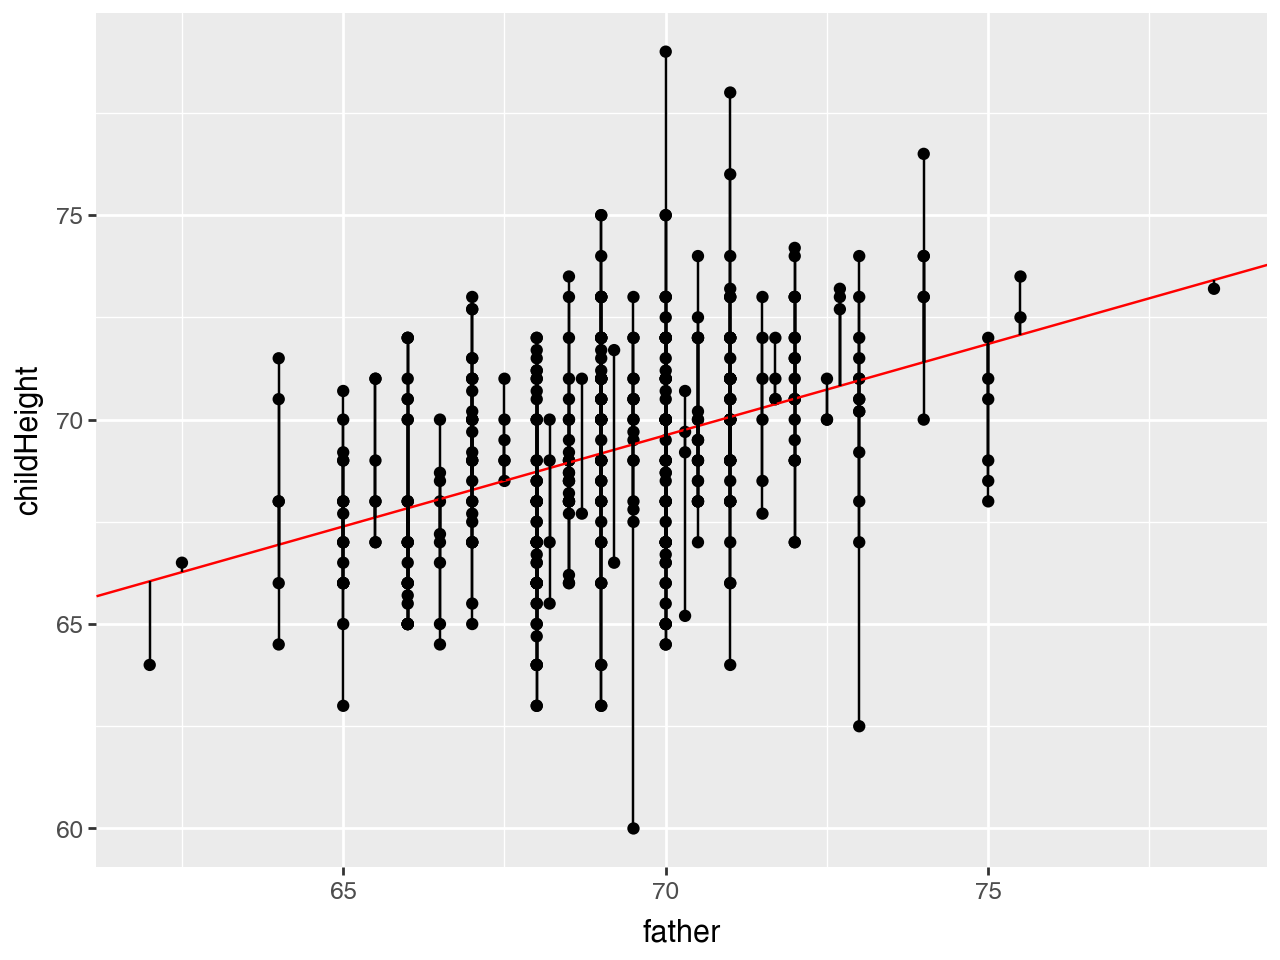

In [17]:
ggplot(data=fathers_sons) +\
    geom_point(mapping=aes(x='father', y='childHeight')) +\
    geom_abline(intercept=fathers_sons_res.params['Intercept'], 
                slope=fathers_sons_res.params['father'], color='red') +\
    geom_linerange(mapping=aes(x='father', 
                               ymin=fathers_sons_res.fittedvalues, 
                               ymax='childHeight'))

* Ας εξετάσουμε τώρα ένα άλλο σύνολο δεδομένων.

* Τα δεδομένα περιλαμβάνουν τις τιμές δύο μεταβλητών `c` και `d` για τις χρονιές από το 1999 μέχρι και το 2019.

In [18]:
cd = pd.read_csv('correlation_regression.csv')
print(cd.shape)
cd.iloc[[0, -1]]

(21, 3)


,year,c,d
0,1999,7.588764,330
20,2019,8.587049,1070


* Όπως μπορούμε να δούμε στο επόμενο διάγραμμα, οι δύο μεταβλητές `c` και `d` φαίνεται να ακολουθούν παρόμοιες πορείες.

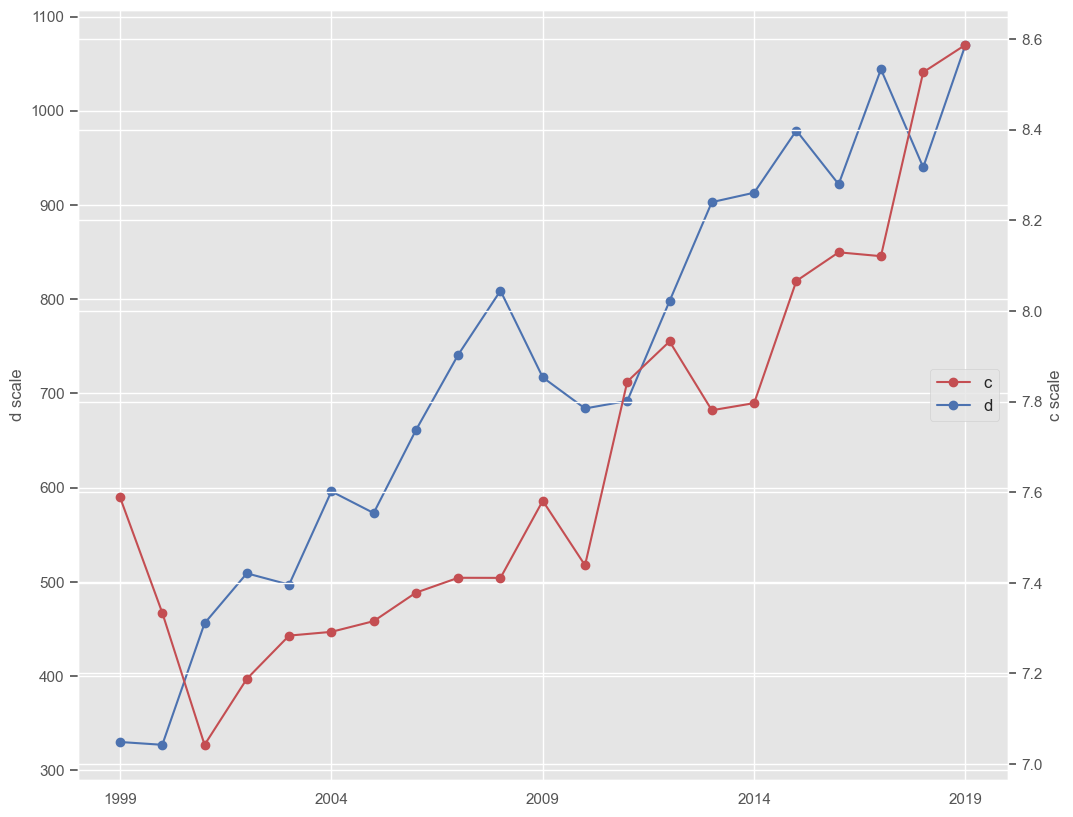

In [19]:
plt.style.use('ggplot')
fig, ax1 = plt.subplots(figsize=(12, 10))
d_line, = ax1.plot(cd.year, cd.d, 'bo-', label='d')
ax1.set_ylabel('d scale')

ax2 = ax1.twinx()
c_line, = ax2.plot(cd.year, cd.c, 'ro-', label='c')
ax2.set_ylabel('c scale')

plt.xticks(np.arange(cd.year.min(), cd.year.max()+1, step=5))
plt.legend(handles=[c_line, d_line], loc='right', fontsize=12)

* Ο συντελεστής συσχέτισης Pearson πράγματι το επιβεβαιώνει αυτό.

In [20]:
# Calculate Pearson correlation
correlation, p_value = stats.pearsonr(x=cd.c, y=cd.d)

# Print the results
print(f"Pearson correlation coefficient: {correlation:.6f}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: 0.798082
P-value: 1.4571618891555346e-05


* Μπορούμε να προχωρήσουμε στη δημιουργία ενός μοντέλου γραμμικής παλινδρόμησης.

In [21]:
cd_mod = smf.ols("d ~ c", data=cd)
cd_res = cd_mod.fit()
cd_res.params

Intercept   -2423.778839
c             410.191120
dtype: float64

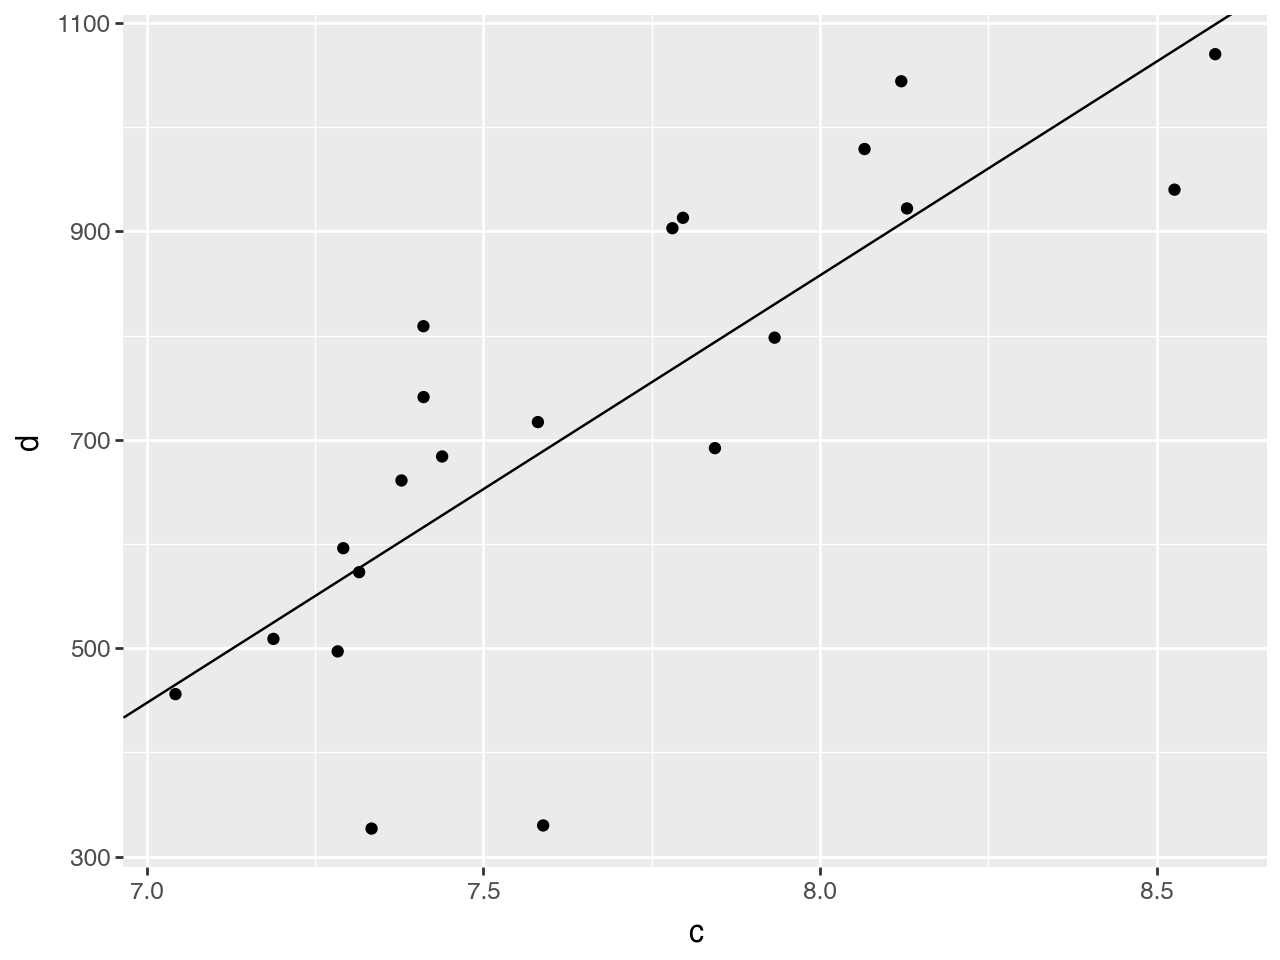

In [22]:
ggplot(data=cd) +\
    geom_point(mapping=aes(x='c', y='d')) +\
    geom_abline(intercept=cd_res.params['Intercept'], 
                slope=cd_res.params['c'])

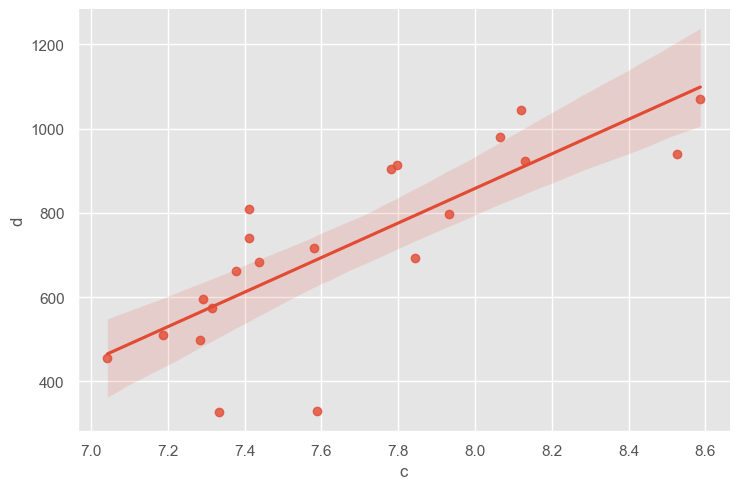

In [23]:
sns.lmplot(x='c', y='d', data=cd, aspect=1.5)

* Και να δούμε και τη σύνοψη.

In [24]:
cd_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      d   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     33.33
Date:                Wed, 16 Jul 2025   Prob (F-statistic):           1.46e-05
Time:                        22:33:40   Log-Likelihood:                -132.06
No. Observations:                  21   AIC:                             268.1
Df Residuals:                      19   BIC:                             270.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2423.7788    545.684     -4.442      0.000   -3565.909   -1281.649
c            410.1911     71.048      5.773      0.000     261.485     558.897
==============================================================================
Omnibus:                        7.240   Durbin-Watson:                   0.817
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                4.796
Skew:                          -1.057   Prob(JB):                       0.0909
Kurtosis:                       4.007   Cond. No.                         143.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Είδαμε λοιπόν ότι το μοντέλο του δεύτερου παραδείγματος ταιριάζει αρκετά καλά με τα δεδομένα, αφού εξηγεί πάνω από το 60% της διακύμανσής τους:

In [25]:
print(f"R-squared (R²) = {cd_res.rsquared}")


R-squared (R²) = 0.6369355871845904


* Αλλά τι αλήθεια ήταν τα δεδομένα μας;

* Ποιες ήταν οι μεταβλητές `c` και `d`;

* Η μεταβλητή `c` είναι στην πραγματικότητα η κατά κεφαλήν κατανάλωση τυριού στις ΗΠΑ τα έτη 1999-2019.

* Η μεταβλητή `d` είναι ο αριθμός θανάτων στις ΗΠΑ από ατυχήματα ασφυξίας και στραγγαλισμού στο κρεβάτι.

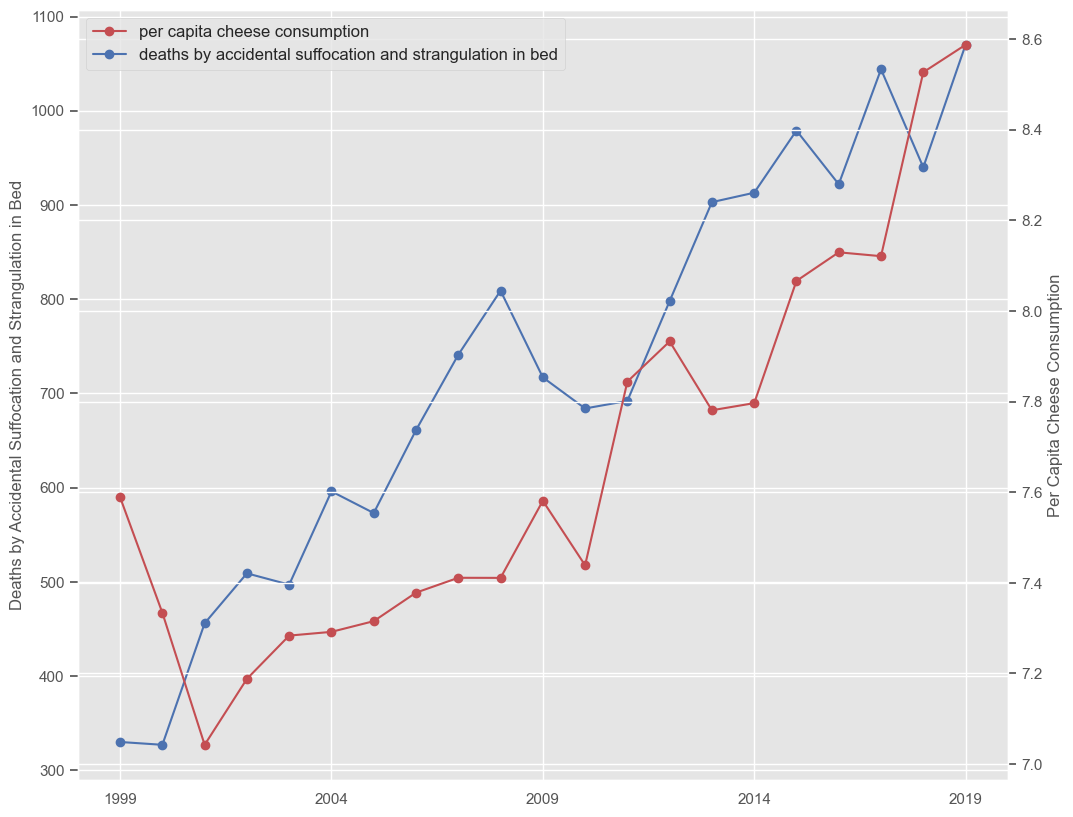

In [26]:
plt.style.use('ggplot')
fig, ax1 = plt.subplots(figsize=(12, 10))
d_line, = ax1.plot(cd.year, cd.d, 'bo-', label='deaths by accidental suffocation and strangulation in bed')
ax1.set_ylabel('Deaths by Accidental Suffocation and Strangulation in Bed')

ax2 = ax1.twinx()
c_line, = ax2.plot(cd.year, cd.c, 'ro-', label='per capita cheese consumption')
ax2.set_ylabel('Per Capita Cheese Consumption')

plt.xticks(np.arange(cd.year.min(), cd.year.max()+1, step=5))
plt.legend(handles=[c_line, d_line], loc='upper left', fontsize=12)

* Πιστεύετε πραγματικά ότι υπάρχει σχέση μεταξύ των δύο;

* Προσοχή: η συσχέτιση δεν είναι αιτιακότητα (correlation does not imply causation)!

* Το ότι παρατηρούμε μια στατιστική σχέση στα δεδομένα μας δεν σημαίνει ότι τα δεδομένα μας δεν είναι άσχετα.

* Μπορείτε να βρείτε το παράδειγμα αυτό, όπως και άλλα, στον ιστότοπο (και βιβλίο) [Spurious Correlations](https://www.tylervigen.com/spurious-correlations) του Tyler Vigen.

* Μια καλή εισαγωγή στην παλινδρόμηση μέσω του Francis Galton, είναι το βιβλίο "The Art of Statistics: Learning from Data", του David Spiegelhater, Pelican, 2019.